# ANALYSE DESCRIPTIVE DATA 3

In [38]:
options(warn=-1)

In [41]:
Gscore=data3$Gscore
Age_Democratie=data3$Age_democratie
Droit_de_lHomme=data3$Droit_de_lHomme
Liberte_economique=data3$Liberte_economique
Inegalite_des_genres=data3$Inegalite_des_genres
Proportion_denfants_harceles=data3$Proportion_denfants_harceles
Corruption=data3$Corruption
Taux_alphabetisation=data3$Taux_alphabetisation
Annes_detudes=data3$Annes_detudes
Espérance_vie=data3$Esperance_vie
Budget_militaire_from_GPD=data3$Budget_militaire_from_GPD
Sous_alimentation=data3$Sous_alimentation
Acces_Internet_pers=data3$Acces_Internet_pers
Acces_electricite_pers=data3$Acces_electricite_pers
Pop_urban=data3$Pop_urban 
Pop_rural=data3$Pop_rural

## Analyse unidimensionnelle
### Boxplot

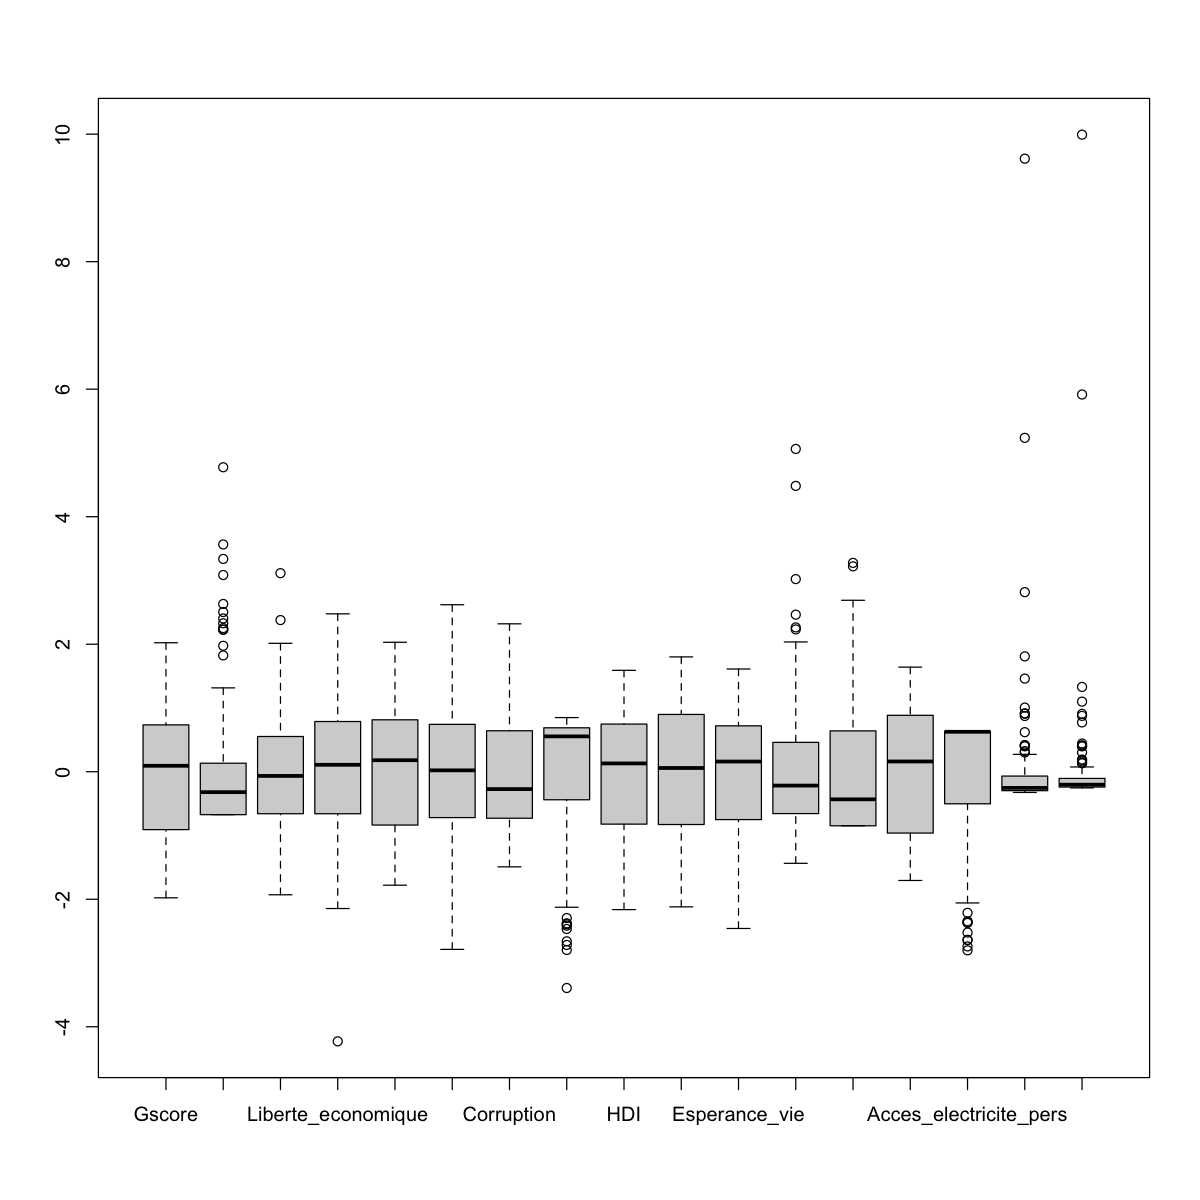

In [42]:
boxplot(scale(data3))

Nombreux Outliers pour Population rurale, urbaine et budget militaire. Mediane presque confondus avec le bout de la moustache haute pour accès à l’électricité, de même mais moins marqué avec Sous-Alimentation (moustache basse) et  Taux d’alphabétisation (moustache haute). Très grande variance par rapport aux autres variables de Enfants harcelés . 

### Histogrammes

[1] "numeric"

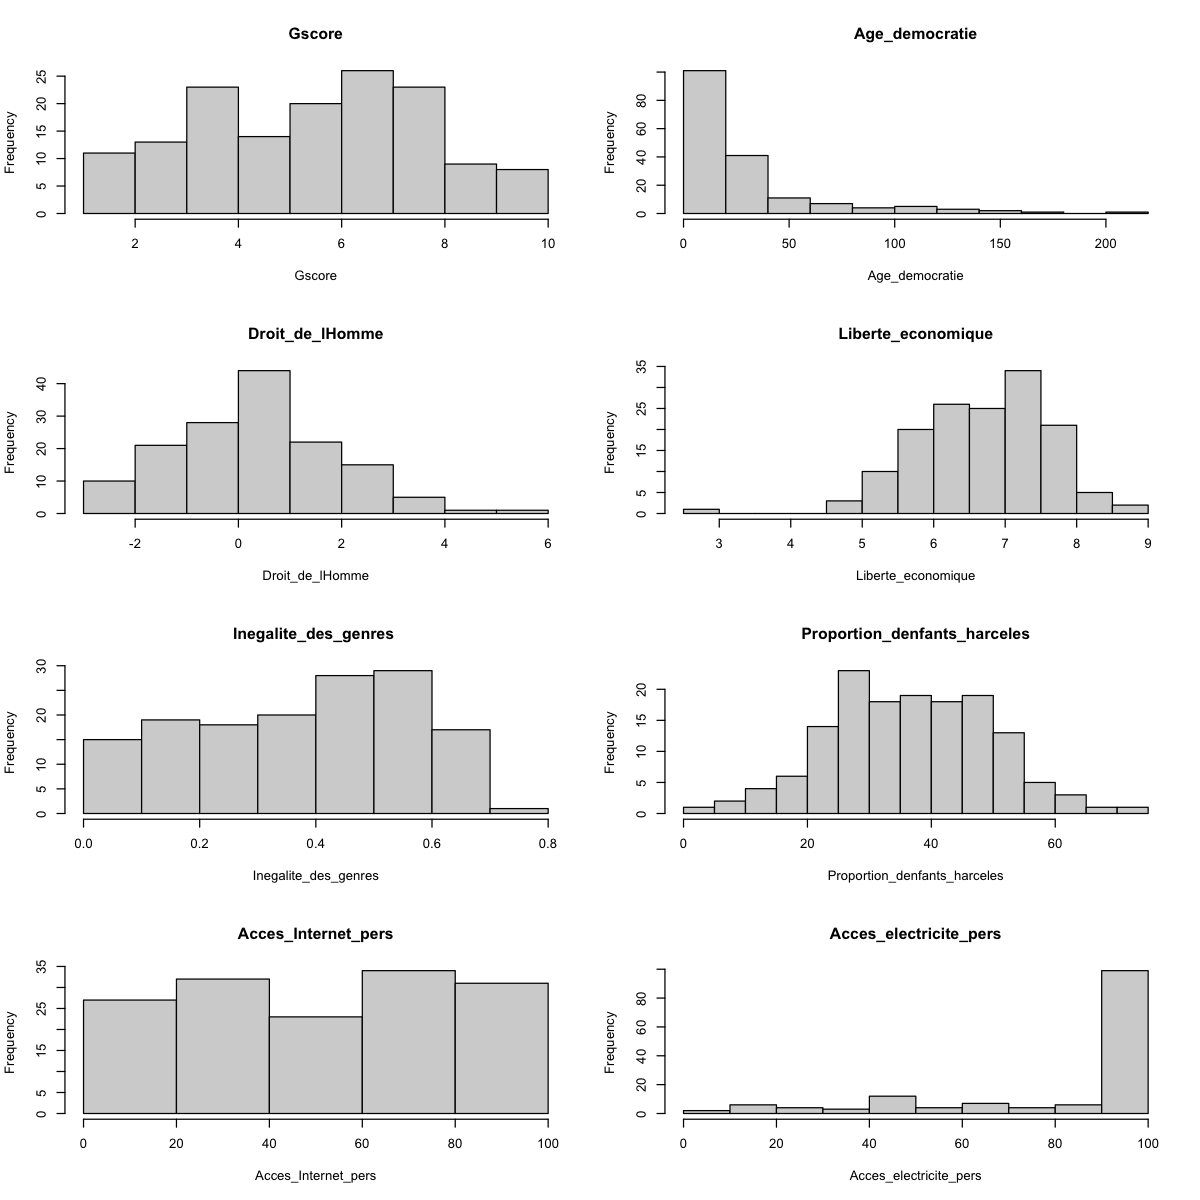

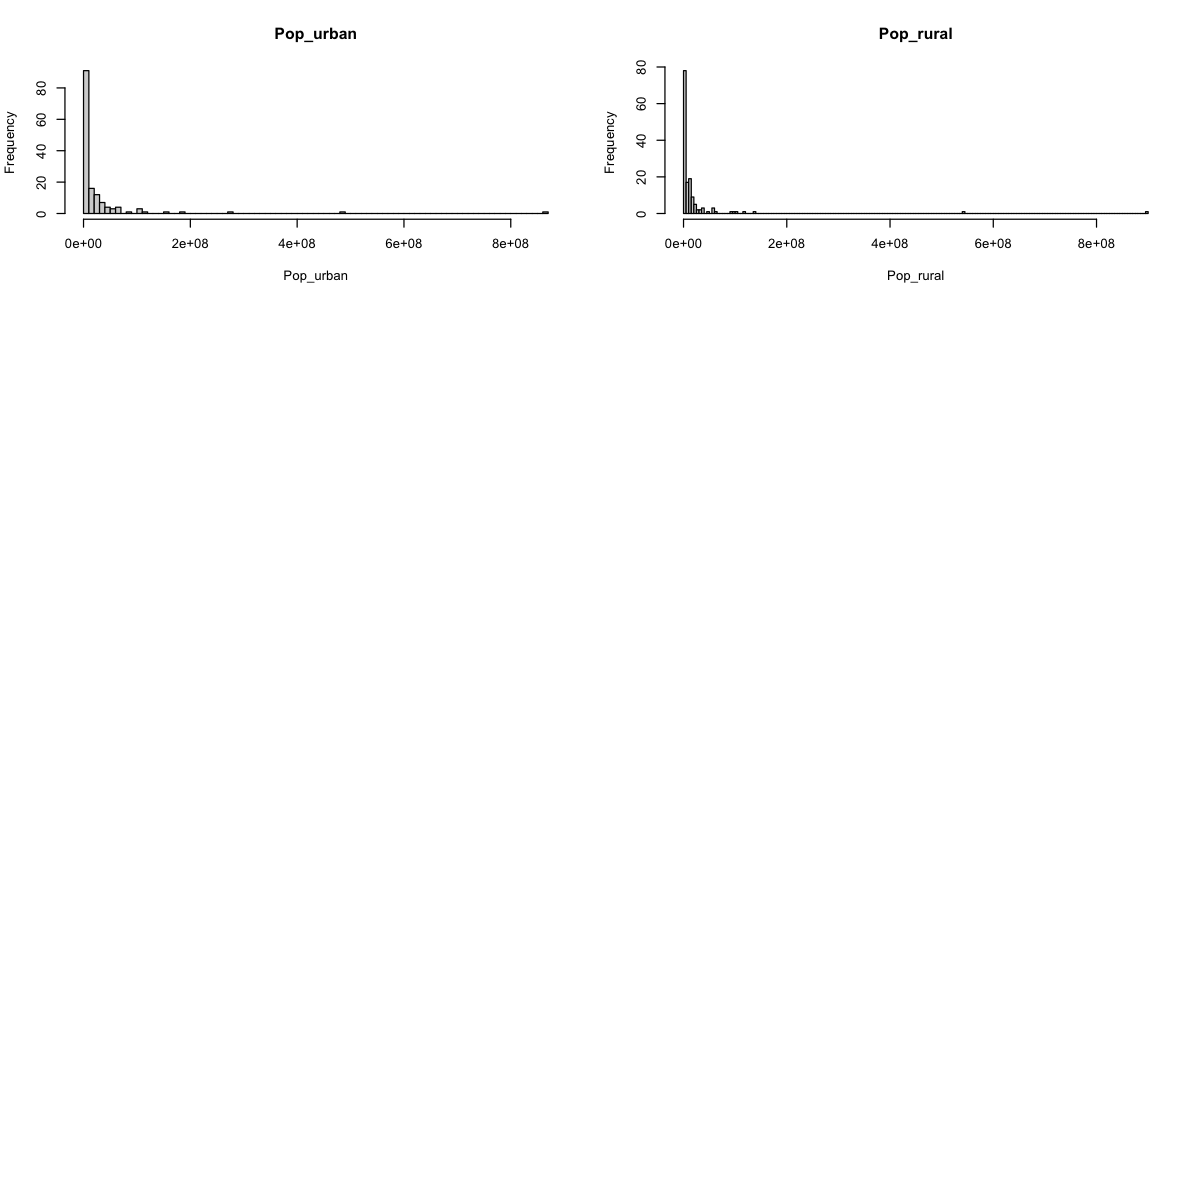

In [43]:
par(mfrow=c(4,2))
class(Gscore)
hist(Gscore,breaks = "FD",freq =TRUE, main = "Gscore",xlab = "Gscore")
hist(Age_democratie,main="Age_democratie", xlab="Age_democratie")
hist(Droit_de_lHomme,breaks = "FD",freq=TRUE, main ="Droit_de_lHomme",xlab="Droit_de_lHomme")
hist(Liberte_economique,breaks = "FD",freq=TRUE, main ="Liberte_economique", xlab="Liberte_economique")
hist(Inegalite_des_genres,breaks = "FD",freq=TRUE, main ="Inegalite_des_genres ",xlab="Inegalite_des_genres")
hist(Proportion_denfants_harceles,breaks = "FD",freq=TRUE, main ="Proportion_denfants_harceles",xlab="Proportion_denfants_harceles")
hist(Acces_Internet_pers,breaks = "FD",freq =TRUE, main = "Acces_Internet_pers",xlab = "Acces_Internet_pers")
hist(Acces_electricite_pers,main="Acces_electricite_pers", xlab="Acces_electricite_pers")
hist(Pop_urban,breaks = "FD",freq=TRUE, main ="Pop_urban",xlab="Pop_urban")
hist(Pop_rural,breaks = "FD",freq=TRUE, main ="Pop_rural", xlab="Pop_rural")

Plusieurs ont un aspect "Gaussiens" : Gscore, Droit de l'Homme, Libertés économiques, enfants harcelés
D'autres constants : accès internet
D'autres logarithmique : Pop urbaine et rurale
Ou exponentiel : âge démocratie

Pour normaliser les données on effectue une transformation en log(log()) des variables de populations et leur donner ainsi un histogramme « gaussien ». Ceci nous permet d’avoir des résultats plus cohérents sur l’ACP.

On enlève age de la démocratie car la variable vaut forcément 0 pour les pays non démocratiques et donnait un caractère extrêmement à part aux USA.

In [44]:
data3 = as.data.frame(data3)
data3 =data3 %>% select(-Age_democratie)

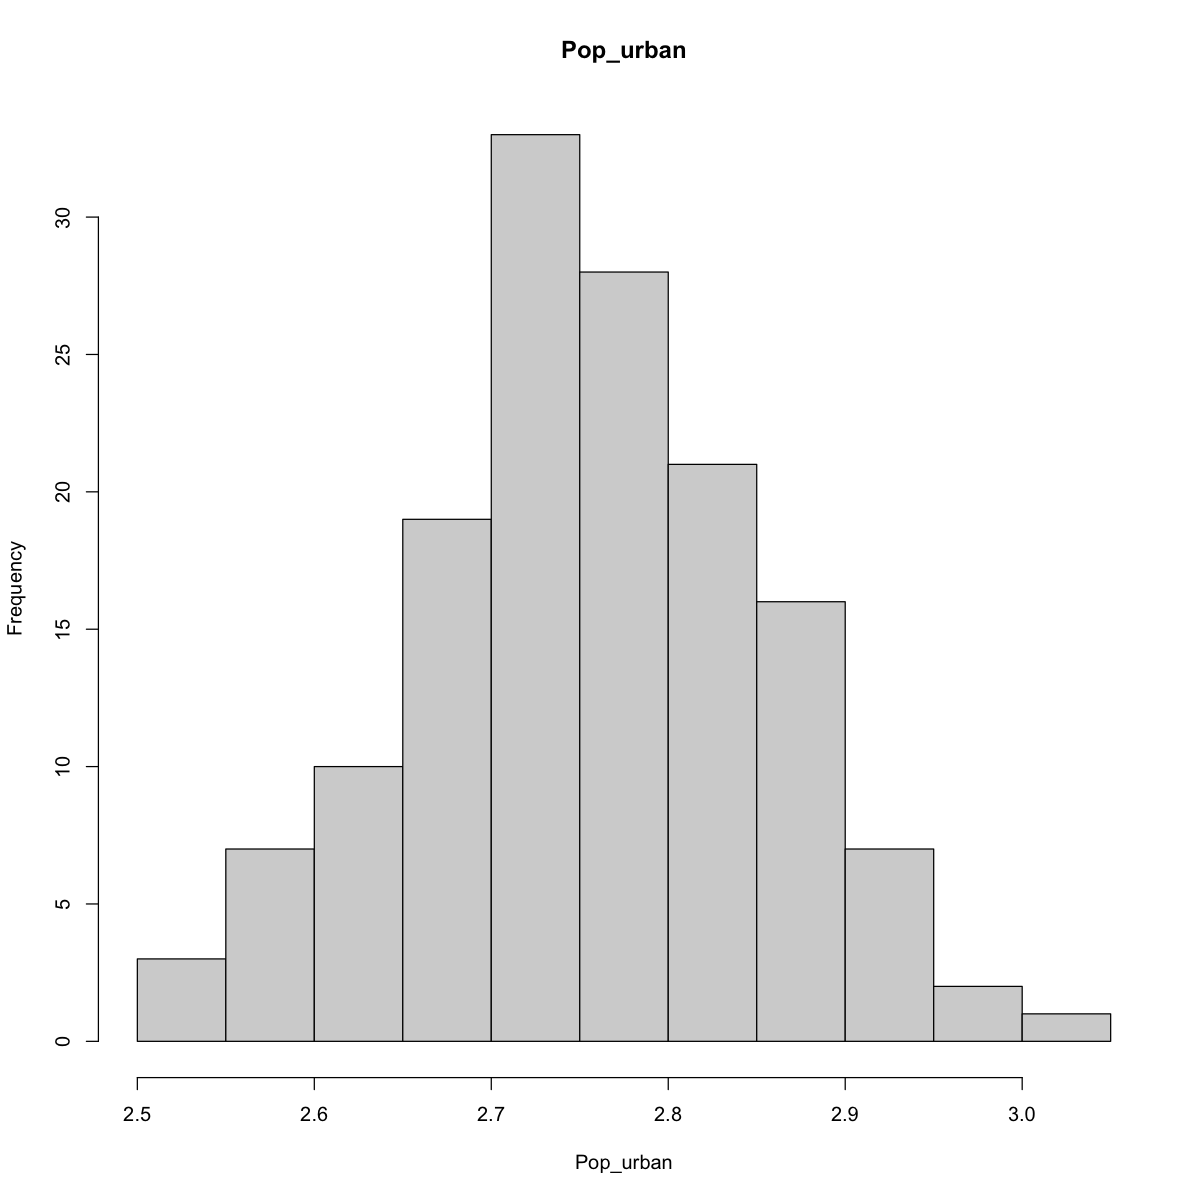

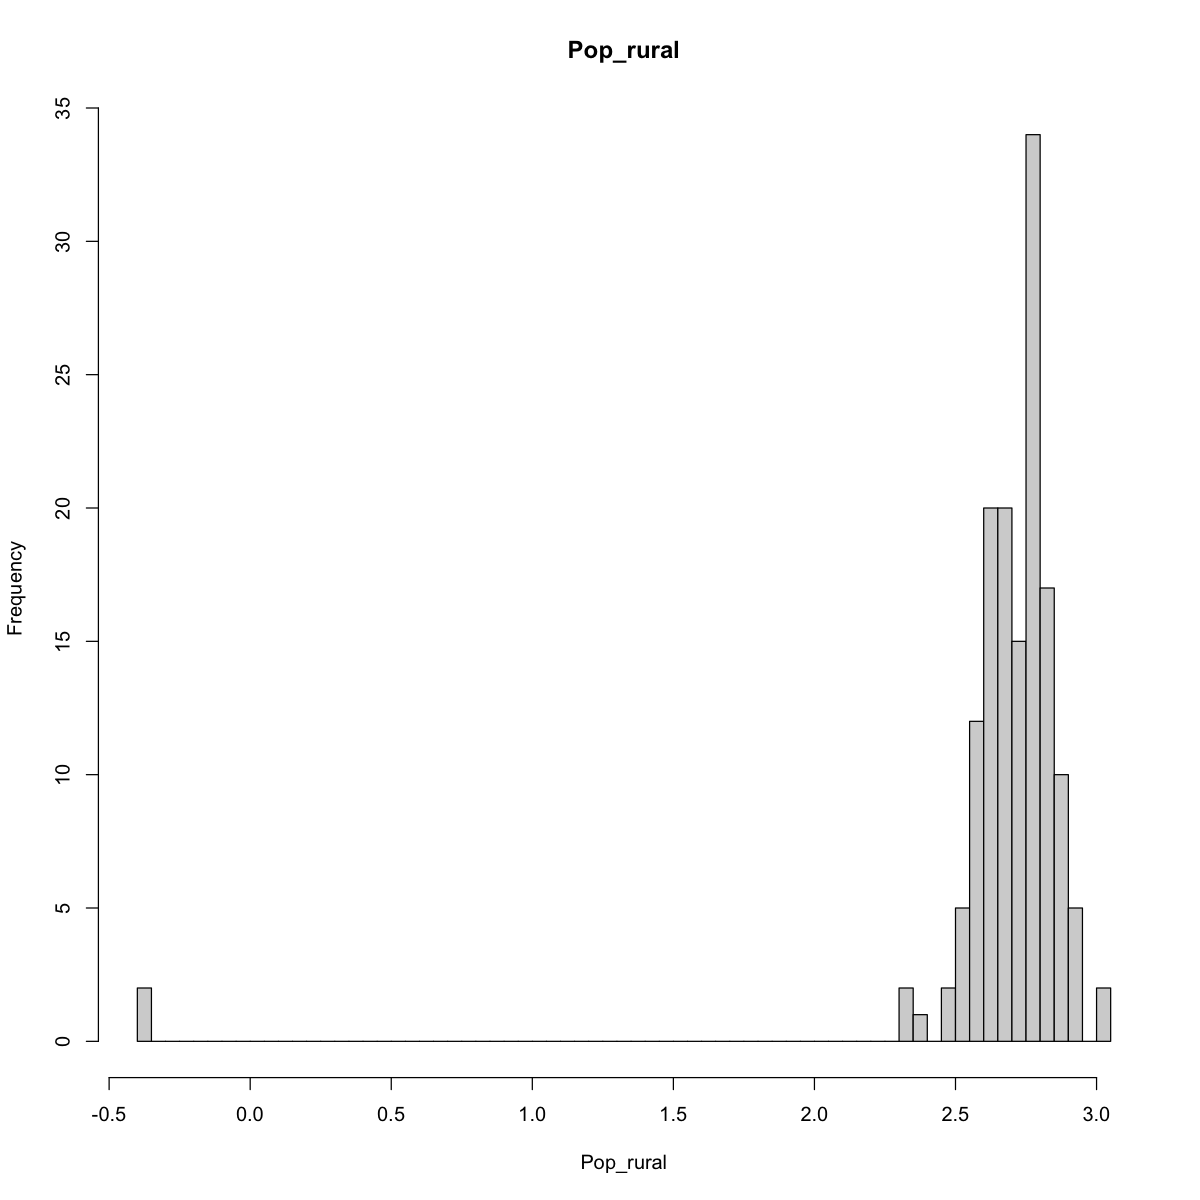

In [45]:
data3[, "Pop_rural"][60]=2
data3[, "Pop_rural"][116]=2
data3L = data3
data3L[, "Pop_urban"] <- log(log(data3[, "Pop_urban"]))
data3L[, "Pop_rural"] <- log(log(data3[, "Pop_rural"]))
hist(data3L$Pop_urban,breaks = "FD",freq=TRUE, main ="Pop_urban",xlab="Pop_urban")
hist(data3L$Pop_rural,breaks = "FD",freq=TRUE, main ="Pop_rural", xlab="Pop_rural")

### Corrélations, analyse bidimensionnelle

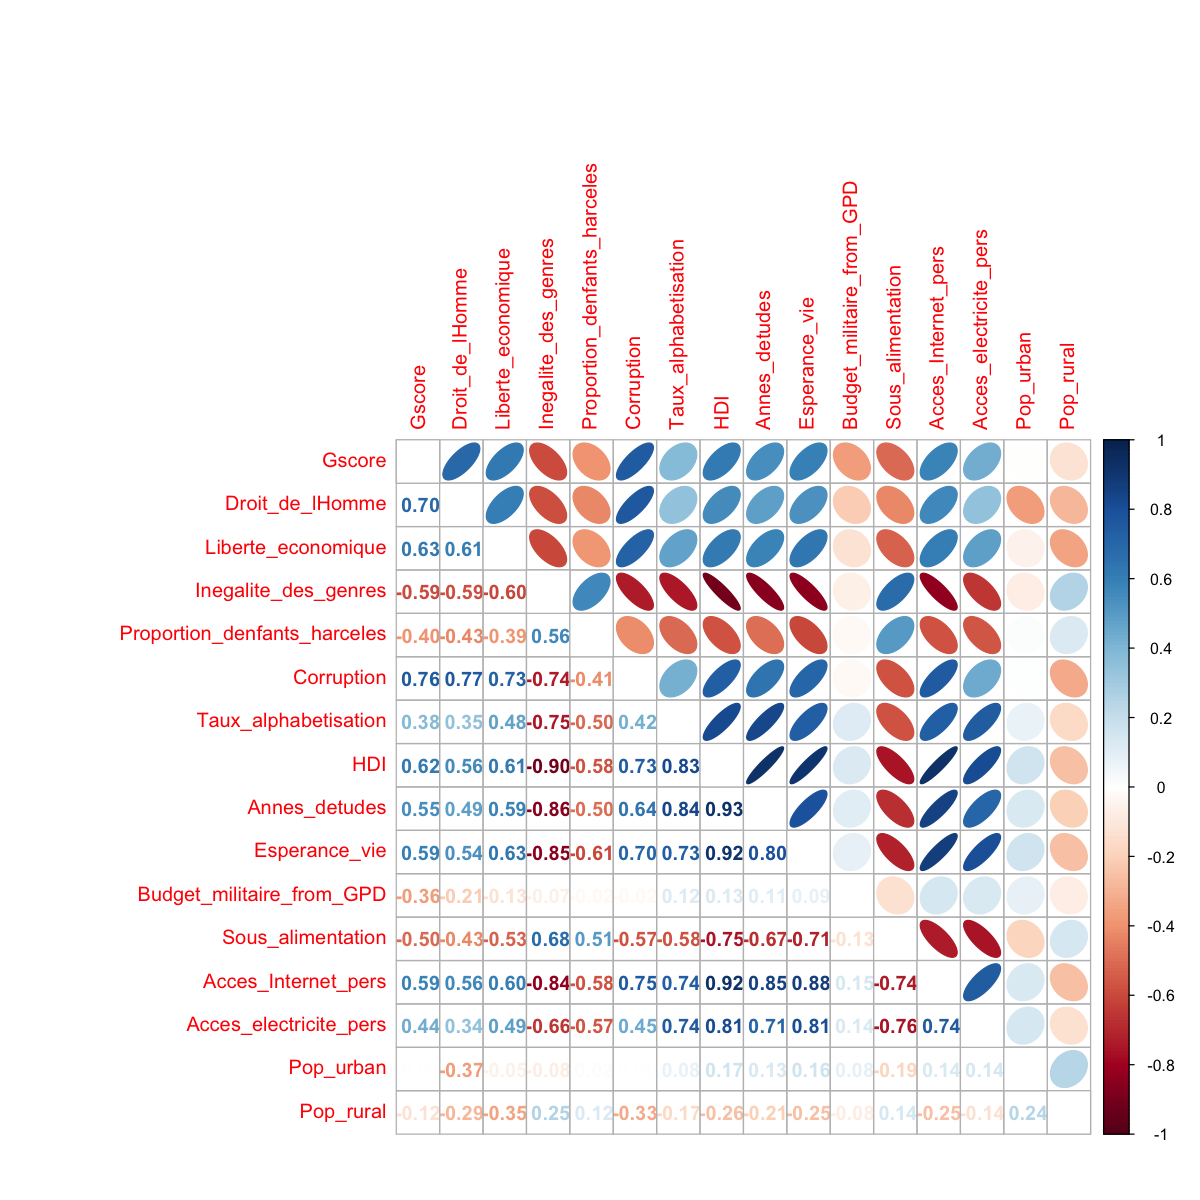

In [46]:
options(repr.plot.width = 10, repr.plot.height = 10)
M=cor(data3L)
corrplot.mixed(M,upper="ellipse",tl.pos="lt")

Forte (au dessus de 0.7)  corrélation positive entre :

- human Right et Gscore
- Corruption et Gscore
- human right et corruption
- liberte eco et corruption
- Corruption et HDI /acces internet
- taux d'alpha et HDI / annees détudes /espérance de vie /internet / electricité
- HDI etannees d'études /espérance de vie/  internet / electricité
- annees d'études et espérance de vie / acces internet / Electicité
- espérance de vie et internet / electicité
- Internet et electricité
- Pop urban et rural

Forte corrélation négative:

- inegalite des genre et corruption /taux alphab / HDI: annes détudes / esperance de vie / internet
- HDI et sous alimentation
- sous alimentation et / espérance de vie /Internet /electricité


## Analyse factorielle


Pourcentages d’inerties cumulées des axes principaux :
   comp 1    comp 2    comp 3    comp 4    comp 5    comp 6    comp 7    comp 8 
 55.44019  67.39116  75.09655  80.41274  84.57940  88.24101  91.13615  93.43262 
   comp 9   comp 10   comp 11   comp 12   comp 13   comp 14   comp 15   comp 16 
 94.98407  96.27650  97.32654  98.23144  98.89614  99.47343  99.86310 100.00000 


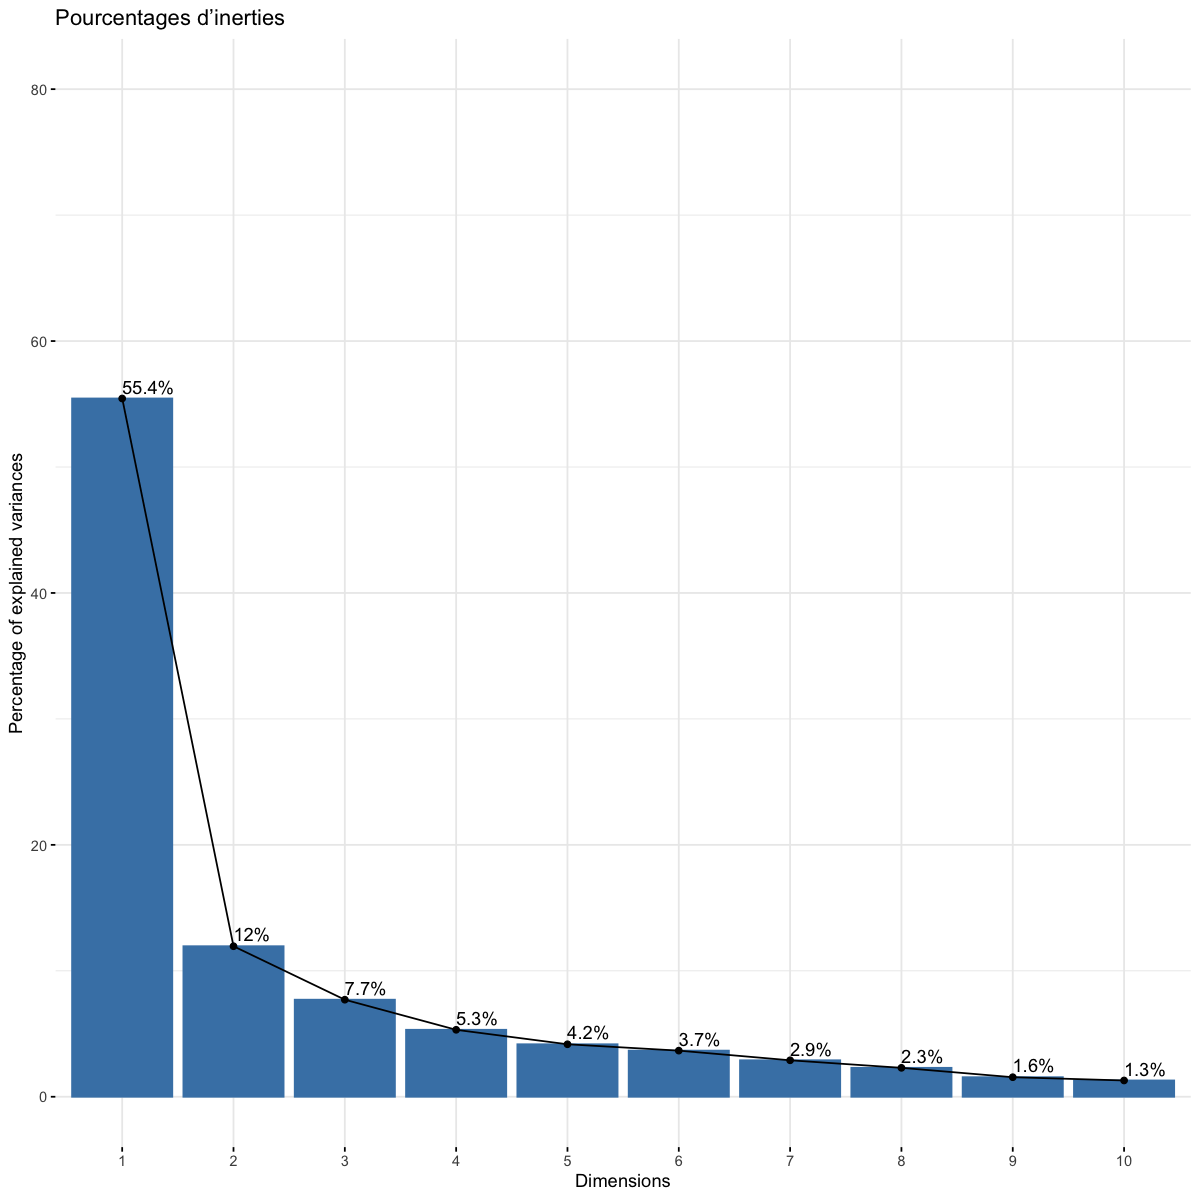

In [47]:
res.acp3 <- PCA(data3L,scale.unit=TRUE,ncp=6, graph=FALSE)

cat("\nPourcentages d’inerties cumulées des axes principaux :\n")
print(res.acp3$eig[,"cumulative percentage of variance"]) 

fviz_screeplot(res.acp3, addlabels = TRUE, ylim = c(0, 80), main="Pourcentages d’inerties")

On garde 3 composantes (75% de la variance expliquée).

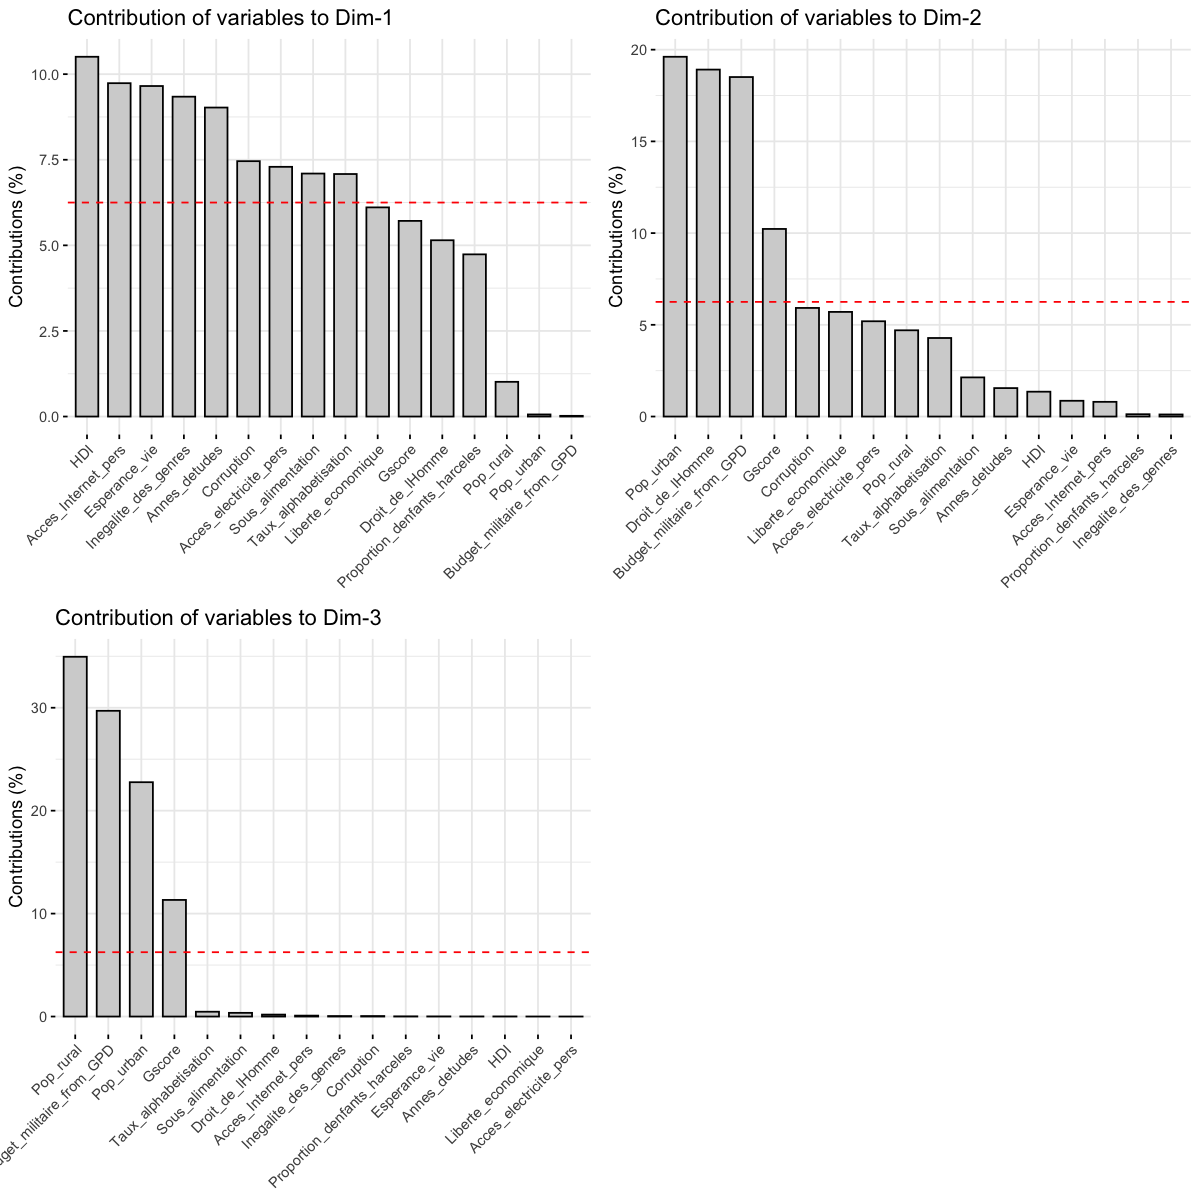

In [48]:
library(factoextra)
library(cowplot)
f1=fviz_contrib(res.acp3, choice="var", axes=1, color="black", fill="lightgray")
f2=fviz_contrib(res.acp3, choice="var", axes=2, color="black", fill="lightgray")
f3=fviz_contrib(res.acp3, choice="var", axes=3, color="black", fill="lightgray")
plot_grid(f1,f2,f3)

Dim 1: HDI, Internet, Espérance de vie, Années d'étude, Inégalités de genre, Corruption, Acces électricité, Alphabétisation et Sous Alimentation

Dim 2:Pop Urbaine, Droit de l'Homme, Budget militaire et gscore

Dim 3: Budget Militaire, Populations rurales et urbaines , Gscore

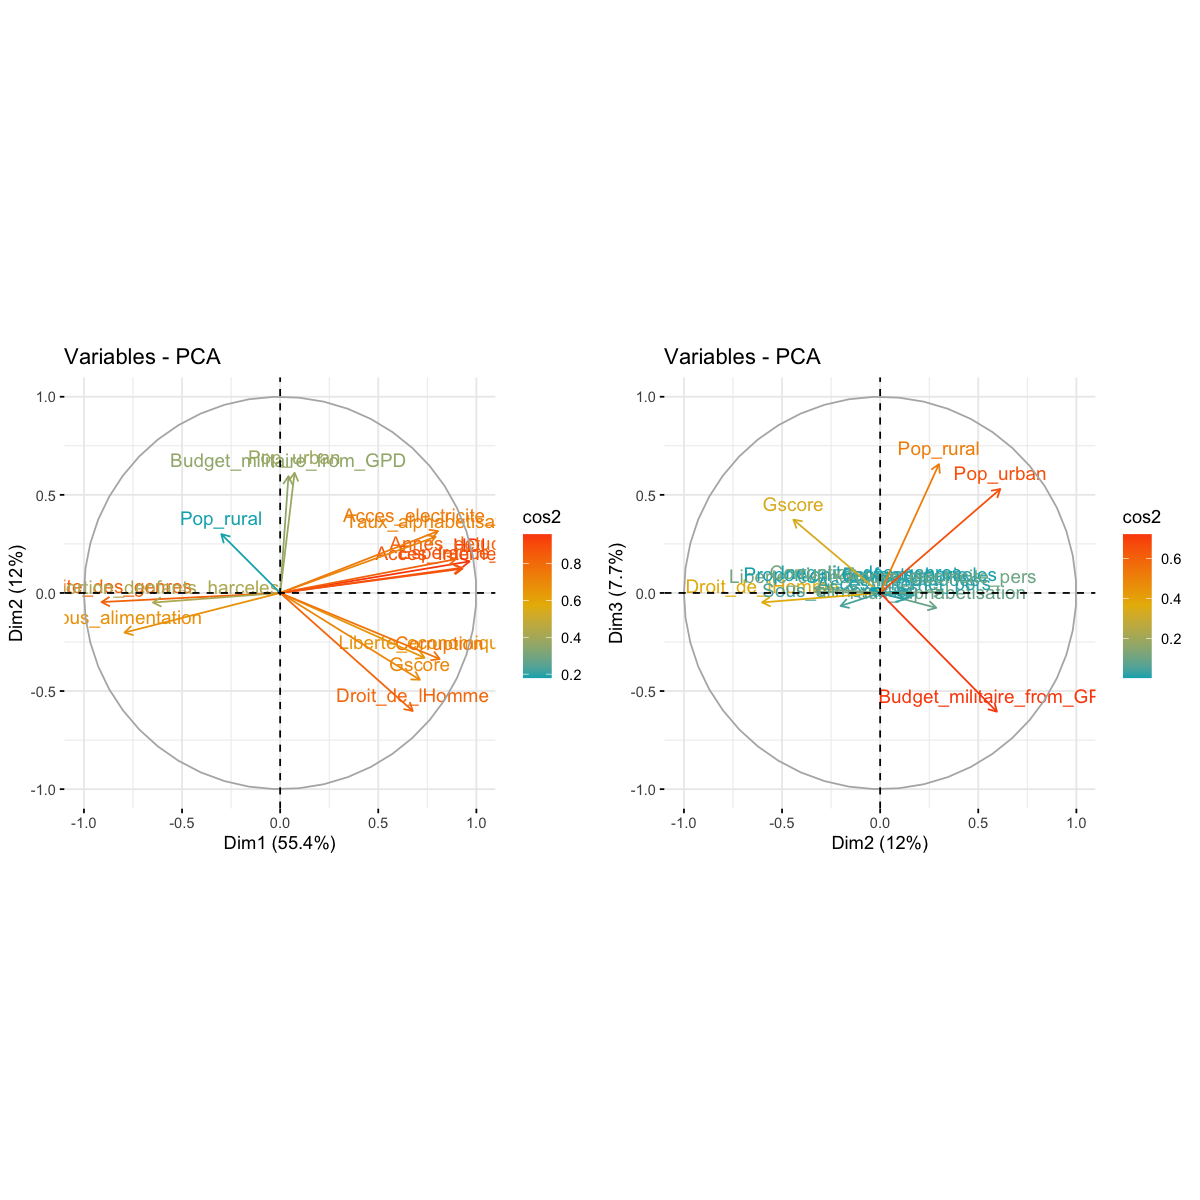

In [49]:
f12=fviz_pca_var(res.acp3, axes=c(1,2), col.var = "cos2",gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")) 
f13=fviz_pca_var(res.acp3, axes=c(2,3), col.var = "cos2",gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")) 
plot_grid(f12,f13)

Dim 1: Bcp de variables sont incorporés dans le HDI (Internet, Espérance de vie, Années d'études, Alphabétisation, SS alimentation).On peut donc y voir un profil HDI haut (avec peu de corruptions)

Dim 2: Profil grand pays urbain belliqueux et non démocratique. (Grande Autocratie)

Dim 3: Grand pays démocratique, peu belliqueux

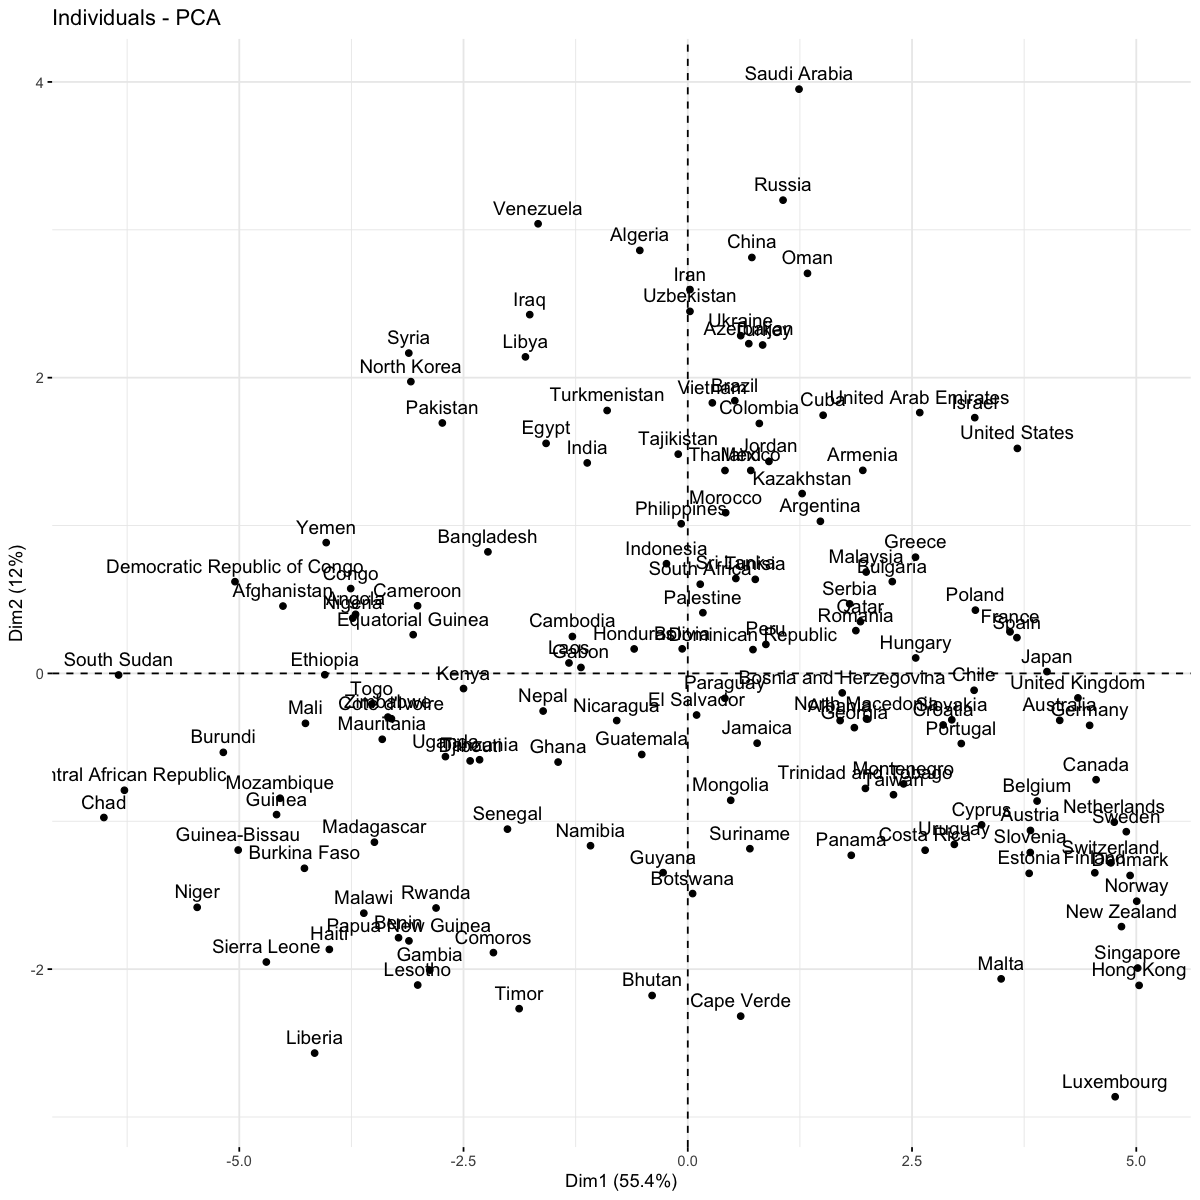

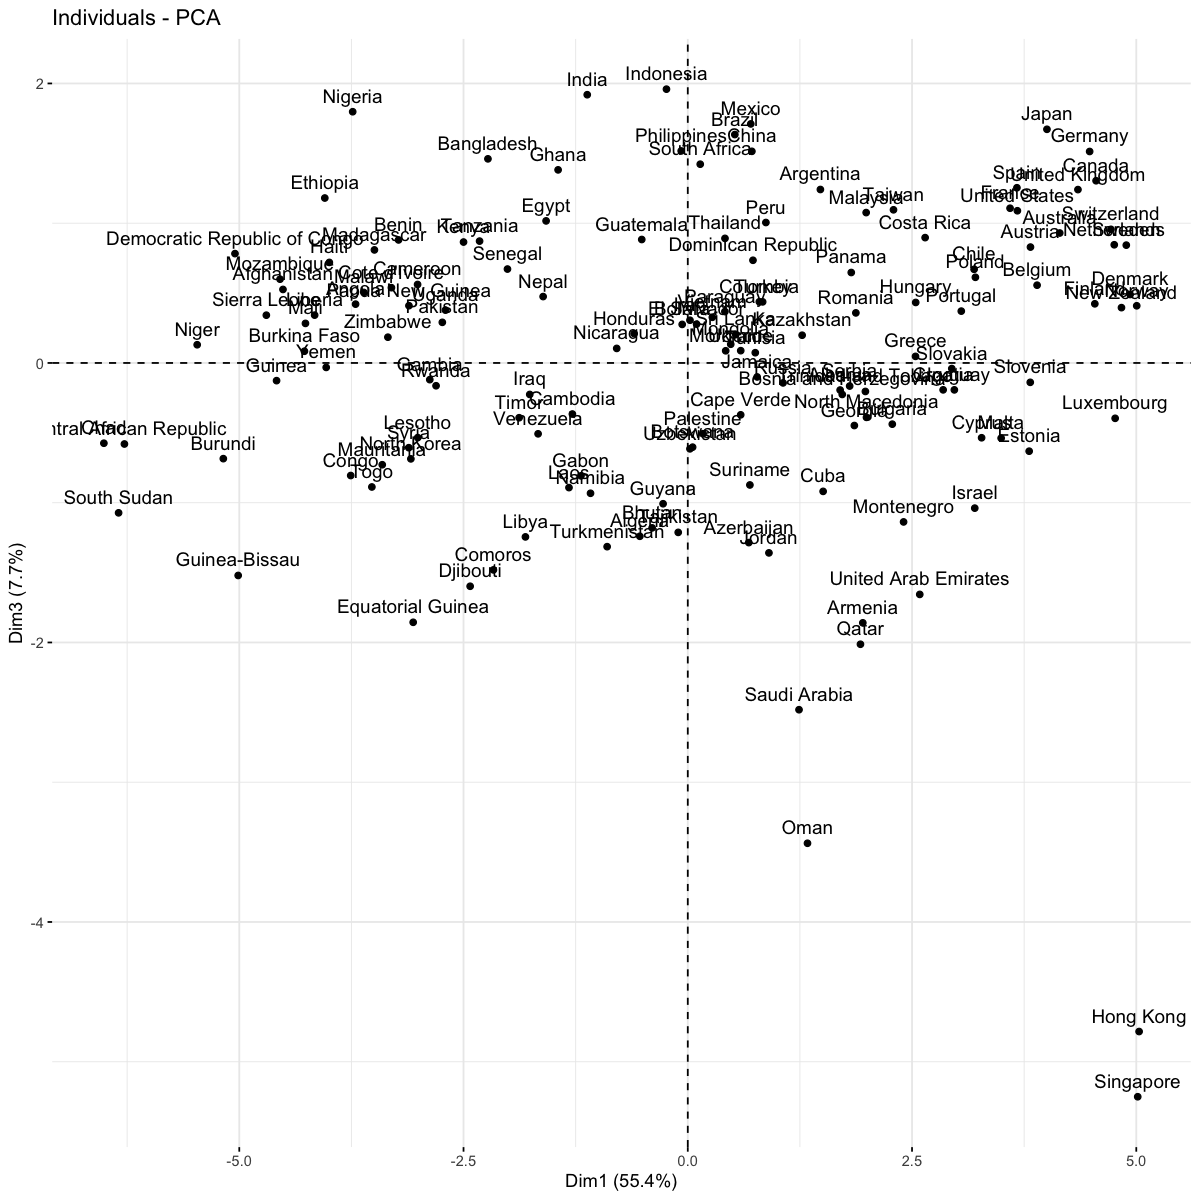

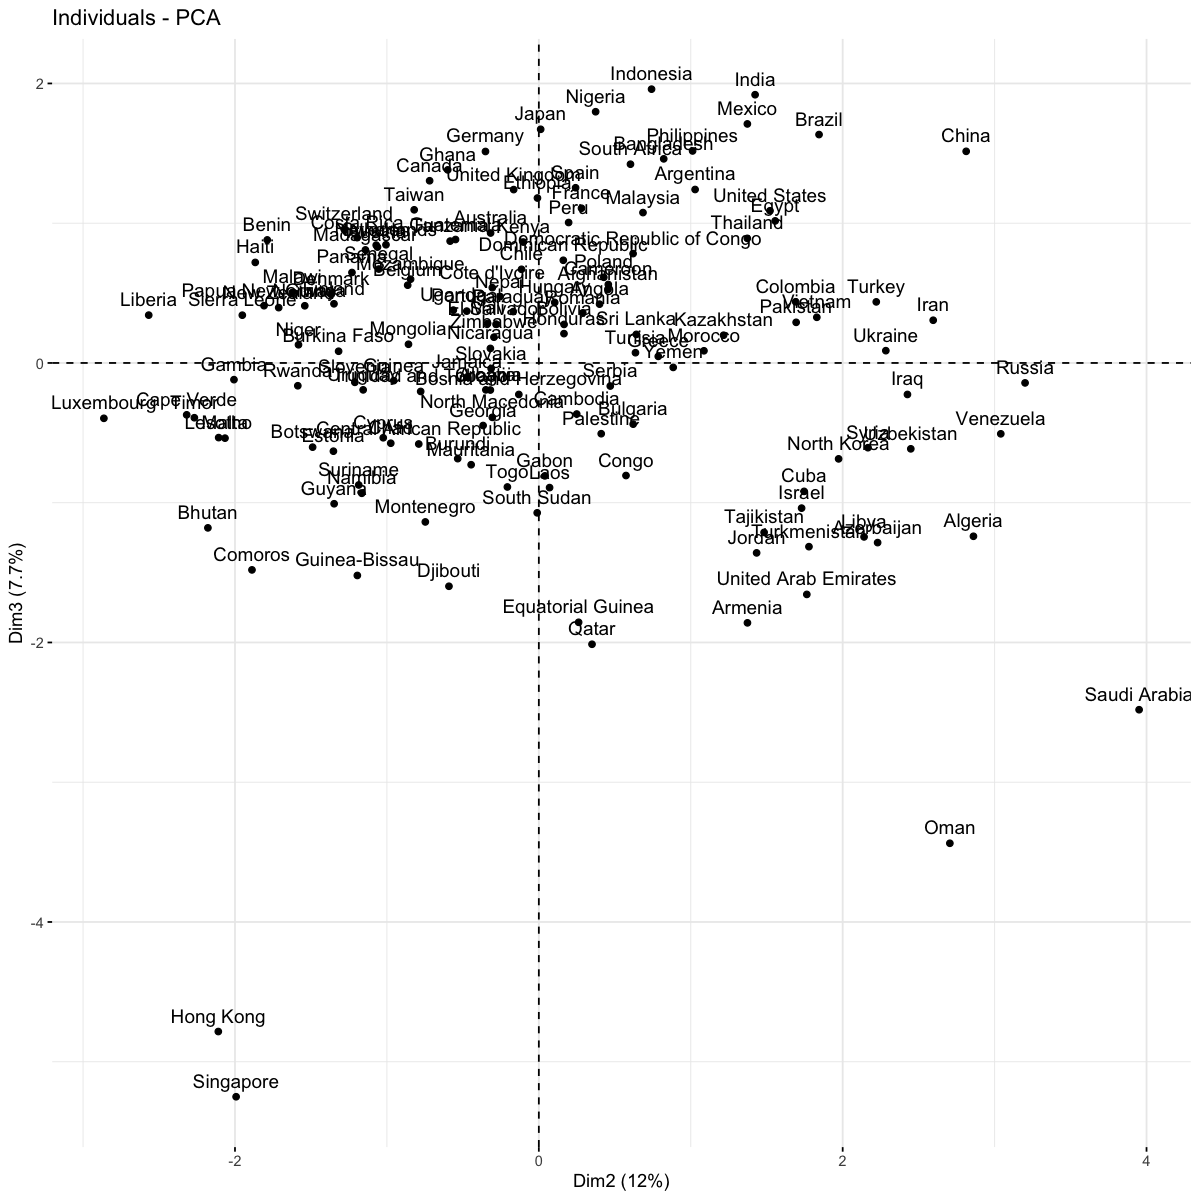

In [50]:
fviz_pca_ind(res.acp3,
             axes=c(1,2)
             )
fviz_pca_ind(res.acp3,
             axes=c(1,3)
             )
fviz_pca_ind(res.acp3,
             axes=c(2,3)
             )


La dimension 2 fait ressortir l'Arabie saoudite et le Luxembourg ou encore le Liberia. 

La dimension 1 montre bien le classement selon le HDI (Honk Kong haut mais seulement 6 en Gscore)

La dimension 3 fait ressortir l'Indonésie, l'Inde ou le Japon ou encore Honk Kong ou Singapour(car petits, score démocratique moyen et assez gros budget militaire)

## Clustering

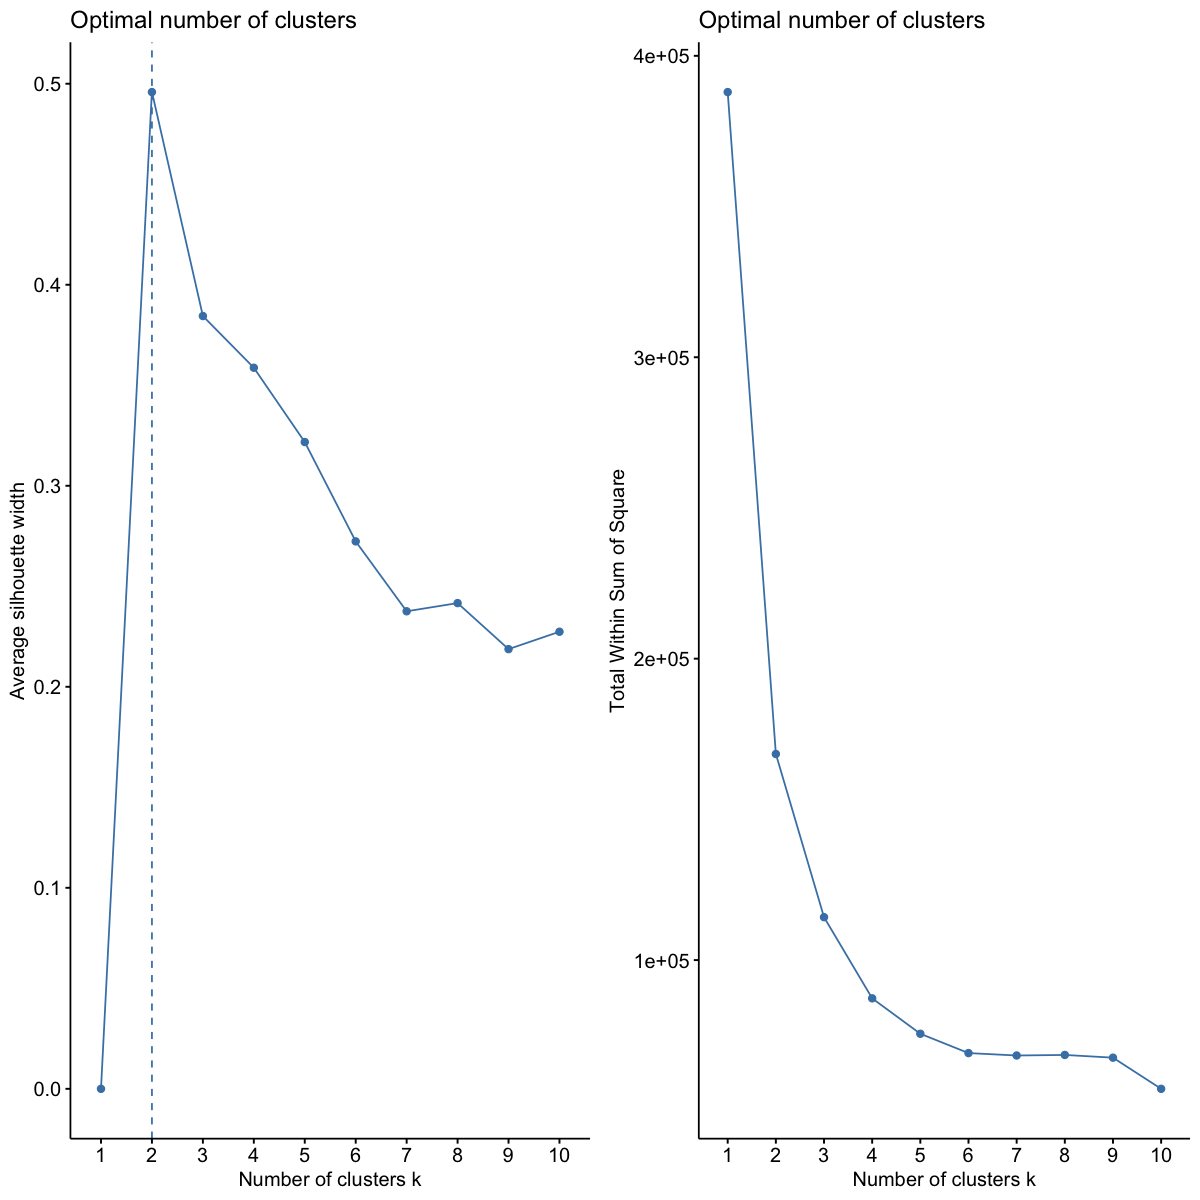

In [51]:
f14=fviz_nbclust(data3L, FUNcluster =kmeans, method = "silhouette")
f15=fviz_nbclust(data3L, FUNcluster =kmeans, method = "wss")
plot_grid(f14,f15)

Le premier critère nous indique 2 clusters avec Kmeans, le second semblerait indiquer plutot 4 ou 5

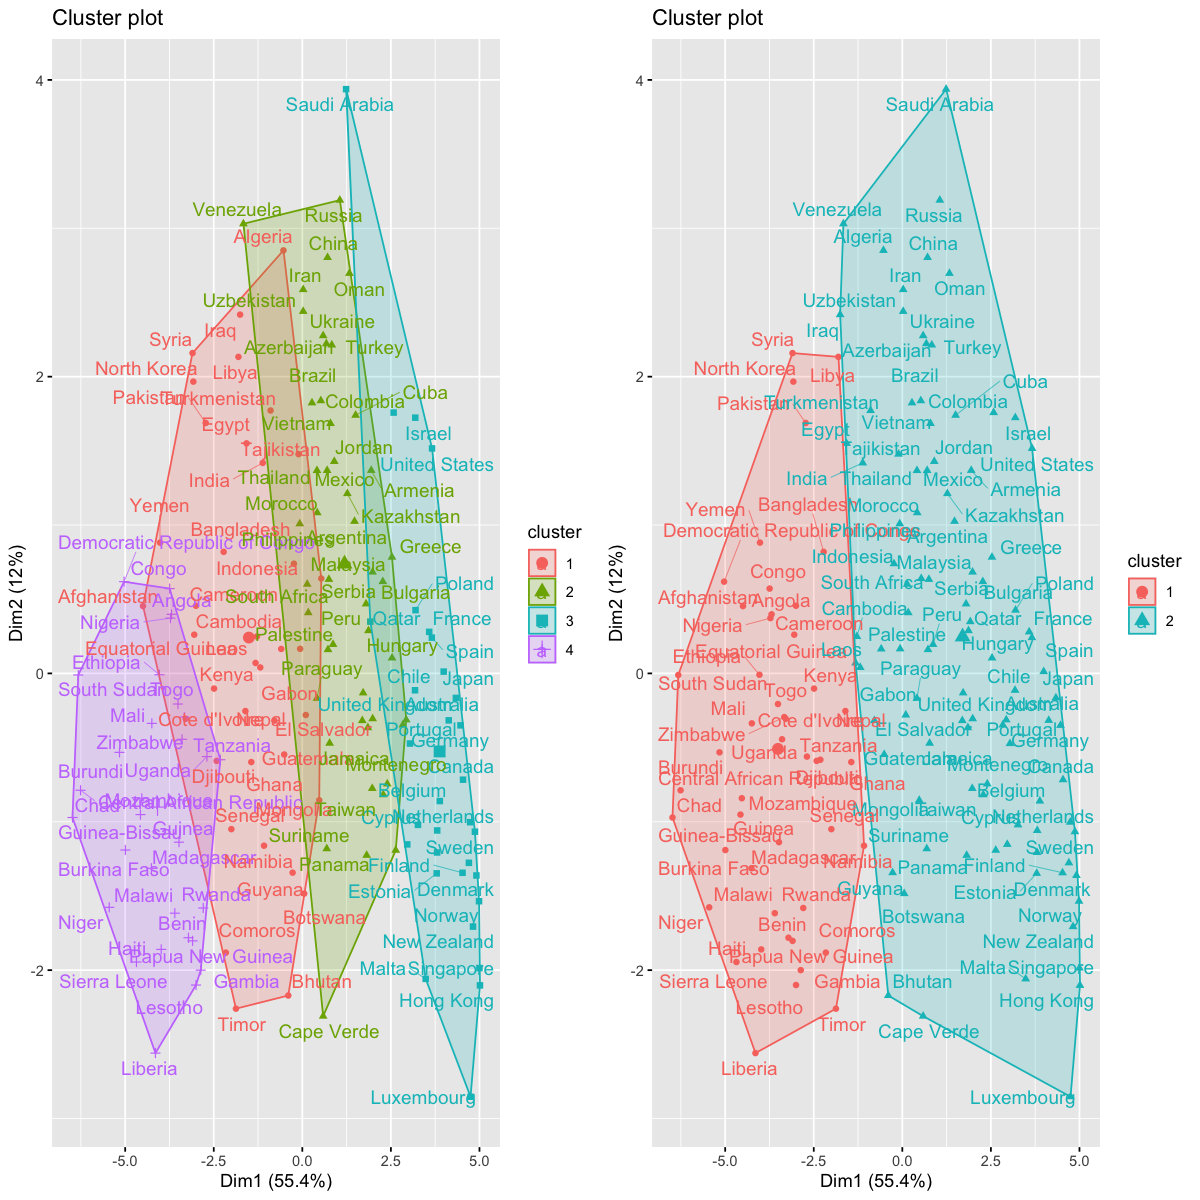

In [52]:
resKM <- kmeans(data3L, centers=4,nstart=20)
f16 = fviz_cluster(resKM, data3L, repel=TRUE) 
resKM2 <- kmeans(data3L, centers=2,nstart=20)
f17 = fviz_cluster(resKM2, data3L, repel=TRUE) 
plot_grid(f16,f17)

On obtient ainsi surtout une séparation selon le HDI.

### Annexe Sens des variables

#### political regime 

It distinguishes between closed autocracies (score 0), electoral autocracies (score 1), electoral democracies (score 2), and liberal democracies (score 3). 
> Cela ressemble à un "indice" de démocratie : https://ourworldindata.org/regimes-of-the-world-data
> Je préfère le laisser de côté pour ne pas concurrencer gscore

On essaiera de l'utiliser plus tard

#### Human Rights

The scores capture the extent to which citizens' physical integrity is protected from government killings, torture,
political imprisonments, extrajudicial executions, mass killings and disappearances. Higher scores mean fewer
such abuses. A score of 0 means an average score relative to all countries and years. A score of 2 is two standard deviations better than the mean across all countries and years.

Données actualisées depuis

#### Economic freedom

The index measures the degree of economic freedom present in five major areas: [1] Size of Government; [2] Legal System and Security of Property Rights; [3] Sound Money; [4] Freedom to Trade Internationally; [5] Regulation. Within the five major areas, there are 42 distinct variables, which are averaged to derive the summary rating for each country. Scores are on a scale of 0-10, where 10 represents maximum economic freedom.

#### Gender - inequality

The GII is an inequality index. It shows the loss in potential human development due to disparity between female and male achievements in two dimensions, empowerment and economic status. The GII ranges between 0 and 1. Higher GII values indicate higher inequalities and thus higher loss to human development.
(critiqué par certains auteurs mais utilisé par les nations unies)

#### Bullied

Percentage of children aged 13-15 who reported being bullied at least once in the past couple of months.

#### Corruption

Annual ranking of countries by their perceived levels of corruption, as determined by expert assessments and opinion surveys. Scale is from 100 (very clean) to 0 (highly corrupt).

#### Litteracy Rate

Estimates correspond to the share of the population older than 14 years that is able to read and write.

#### HDI

The Human Development Index (HDI) is a summary measure of key dimensions of human development: a long and healthy life, a good education, and having a decent standard of living.

#### Mean Year of schooling

Average total years of schooling for adult population

#### Life expectancy

Life expectancy at birth is defined as the average number of years that a newborn could expect to live if he or she were to pass through life subject to the age-specific mortality rates of a given period.


#### Military expenditure as a share of GPD

GPD = PIB (permet de quantifier la valeur totale de la « production de richesse » annuelle effectuée par les agents économiques (ménages, entreprises, administrations publiques) résidant à l'intérieur d'un territoire.)

problème avec ces données aussi. Elles ont été mises à jour.

#### Undernourishment

Share of people of the population who are undernourished
Undernourishment measures the share of the population that has a caloric intake which is insufficient to meet the
minimum energy requirements necessary for a given individual. 
Add region

#### Internet

Share of the population using the Internet

#### Electricity

the percentage of population with access to electricity

#### Urban and rural population

Number of individuals living in cities or not
